In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import subprocess
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [6]:
import os
print(os.listdir("../input"))

['.ipynb_checkpoints', 'BlackFriday.csv', 'Featuresdataset.csv', 'RDA-checkpoint.ipynb', 'RDA.ipynb', 'Retail Data Analysis-checkpoint.ipynb', 'Retail Data Analysis.ipynb', 'salesdataset.csv', 'storesdataset.csv', 'Untitled.ipynb']


In [7]:
features = pd.read_csv('Featuresdataset.csv')
sales = pd.read_csv('salesdataset.csv')
stores = pd.read_csv('storesdataset.csv')

In [8]:
print(features.head())
features.shape

   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1    5/2/2010        42.31       2.572        NaN        NaN   
1      1   12/2/2010        38.51       2.548        NaN        NaN   
2      1  19/02/2010        39.93       2.514        NaN        NaN   
3      1  26/02/2010        46.63       2.561        NaN        NaN   
4      1    5/3/2010        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False  


(8190, 12)

In [9]:
print(sales.head())
sales.shape

   Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  05/02/2010      24924.50      False
1      1     1  12/02/2010      46039.49       True
2      1     1  19/02/2010      41595.55      False
3      1     1  26/02/2010      19403.54      False
4      1     1  05/03/2010      21827.90      False


(421570, 5)

In [10]:
print(stores.head())
stores.shape

   Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875


(45, 3)

In [11]:
final = sales.merge(features,how="left", on=['Store', 'Date', 'IsHoliday'])

In [12]:
final.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,05/02/2010,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,12/02/2010,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,05/03/2010,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
final.shape

(421570, 14)

In [14]:
final = final.merge(stores, how= "left", on=['Store'])
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,12/02/2010,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,19/02/2010,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315


In [15]:
final.shape

(421570, 16)

In [16]:
info = pd.DataFrame(final.dtypes).T.rename(index = {0:'Column Type'})
info = info.append(pd.DataFrame(final.isnull().sum()).T.rename(index = {0:'null values (nb)'}))
info = info.append(pd.DataFrame(final.isnull().sum()/final.shape[0]*100).T.rename(index = {0:'null values{%}'}))
info

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column Type,int64,int64,object,float64,bool,float64,float64,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb),0,0,0,0,0,156325,156325,321104,343929,333404,332354,320698,156325,156325,0,0
null values{%},0,0,0,0,0,37.0816,37.0816,76.1686,81.5829,79.0863,78.8372,76.0723,37.0816,37.0816,0,0


In [17]:
final.drop(['Temperature', 'Fuel_Price'], axis = 1, inplace = True)
final.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,05/02/2010,24924.50,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
1,1,1,12/02/2010,46039.49,True,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315
2,1,1,19/02/2010,41595.55,False,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,26/02/2010,19403.54,False,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,05/03/2010,21827.90,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,151315


In [18]:
final['Date'] = pd.to_datetime(final.Date)
final1 = final.sort_values(['Date'])
final1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
320135,33,96,2010-01-10,7854.09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,39690
166671,17,93,2010-01-10,3533.76,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,93188
292156,30,85,2010-01-10,43.92,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,42988
292297,30,87,2010-01-10,119.80,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,42988
84936,9,55,2010-01-10,6795.58,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,125833


In [19]:
#Making Avg MarkDown

final1.MarkDown1.fillna(0)
final1.MarkDown2.fillna(0)
final1.MarkDown3.fillna(0)
final1.MarkDown4.fillna(0)
final1.MarkDown5.fillna(0)
final1.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
320135,33,96,2010-01-10,7854.09,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A,39690
166671,17,93,2010-01-10,3533.76,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,93188
292156,30,85,2010-01-10,43.92,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,42988
292297,30,87,2010-01-10,119.80,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,C,42988
84936,9,55,2010-01-10,6795.58,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,125833


In [20]:
info = pd.DataFrame(final1.dtypes).T.rename(index = {0:'Column Type'})
info = info.append(pd.DataFrame(final1.isnull().sum()).T.rename(index = {0:'null values (nb)IsMarDown'}))
info = info.append(pd.DataFrame(final1.isnull().sum()/final1.shape[0]*100).T.rename(index = {0:'null values{%}'}))
info

,Store,Dept,Date,Weekly_Sales,IsHoliday,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
Column Type,int64,int64,datetime64[ns],float64,bool,float64,float64,float64,float64,float64,float64,float64,object,int64
null values (nb)IsMarDown,0,0,0,0,0,321104,343929,333404,332354,320698,156325,156325,0,0
null values{%},0,0,0,0,0,76.1686,81.5829,79.0863,78.8372,76.0723,37.0816,37.0816,0,0


In [21]:
print("Duplicate Values : ",final.duplicated().sum())

Duplicate Values :  0


In [22]:
#Average Sales for all store/department for Week

df_average_sales_week = final.groupby(by=['Date'], as_index=False)['Weekly_Sales'].sum()
df_average_sales = df_average_sales_week.sort_values('Weekly_Sales', ascending=False)

print(df_average_sales[:10])

          Date  Weekly_Sales
46  2010-12-24   80931415.60
98  2011-12-23   76998241.31
95  2011-11-25   66593605.26
41  2010-11-26   65821003.24
45  2010-12-17   61820799.85
97  2011-12-16   60085695.94
35  2010-10-12   55666770.39
83  2011-09-12   55561147.70
120 2012-06-04   53502315.87
121 2012-06-07   51253021.88


In [ ]:
#Seasonality vs Trend Analysis
plt.figure(figsize=(15,6))
plt.plot(df_average_sales_week.Date, df_average_sales_week.Weekly_Sales)
plt.show()

In [ ]:
df_average_sales_week.head()

In [25]:
#Sales variation during Holidays(Store/Dept)
holiday =  final1[['Date', 'IsHoliday', 'Weekly_Sales']].copy()
holiday =  holiday.groupby(by=['Date','IsHoliday'], as_index=False)['Weekly_Sales'].sum()
holiday_group =  holiday.groupby(by=['IsHoliday'], as_index=False)['Weekly_Sales'].sum()
print(holiday_group)
print(holiday[:5])

#def holiday_sales(df):
#    from matplotlib import pyplot as plt
#    plt.figure(figsize=(15,6))
#    labels = ['Date', 'IsHoliday_x', 'Weekly_Sales']
#    plt.title('Sales Variation During Holidays')
#    plt.plot(df.Date, df.Weekly_Sales)
#    plt.show()
    
#holiday_sales(holiday)

   IsHoliday  Weekly_Sales
0      False  6.231919e+09
1       True  5.052996e+08
        Date  IsHoliday  Weekly_Sales
0 2010-01-10      False   42239875.87
1 2010-02-04      False   50423831.26
2 2010-02-07      False   48917484.50
3 2010-02-19      False   48276993.78
4 2010-02-26      False   43968571.13


In [26]:
final1["TotalMarkDown"] = final1.MarkDown1 + final1.MarkDown2 + final1.MarkDown3 + final1.MarkDown4 + final1.MarkDown5

In [27]:
final2 = final1.drop(["Store", "Dept", "MarkDown1", "MarkDown2", "MarkDown3", "MarkDown4", "MarkDown5"], axis =1)

In [28]:
final2[np.isnan(final2.TotalMarkDown)] = 0

In [29]:
final2.sort_values("TotalMarkDown", ascending = False)

,Date,Weekly_Sales,IsHoliday,CPI,Unemployment,Type,Size,TotalMarkDown
89191,2011-11-25 00:00:00,7911.19,True,129.8364,7.874,B,126512,143223.31
95139,2011-11-25 00:00:00,10533.11,True,129.8364,7.874,B,126512,143223.31
95282,2011-11-25 00:00:00,23884.90,True,129.8364,7.874,B,126512,143223.31
94425,2011-11-25 00:00:00,65635.44,True,129.8364,7.874,B,126512,143223.31
93987,2011-11-25 00:00:00,3205.00,True,129.8364,7.874,B,126512,143223.31
89763,2011-11-25 00:00:00,34367.03,True,129.8364,7.874,B,126512,143223.31
91727,2011-11-25 00:00:00,6287.36,True,129.8364,7.874,B,126512,143223.31
96292,2011-11-25 00:00:00,209.22,True,129.8364,7.874,B,126512,143223.31
89620,2011-11-25 00:00:00,9560.68,True,129.8364,7.874,B,126512,143223.31
93014,2011-11-25 00:00:00,21705.30,True,129.8364,7.874,B,126512,143223.31


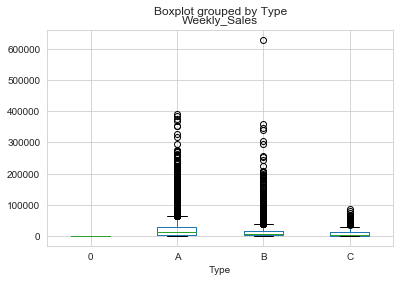

In [30]:
final2.boxplot(column='Weekly_Sales', by='Type');

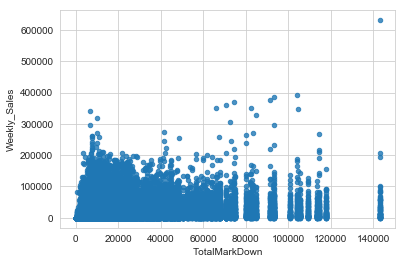

In [31]:
final2.plot(kind='scatter', x='TotalMarkDown', y='Weekly_Sales', alpha=0.8)

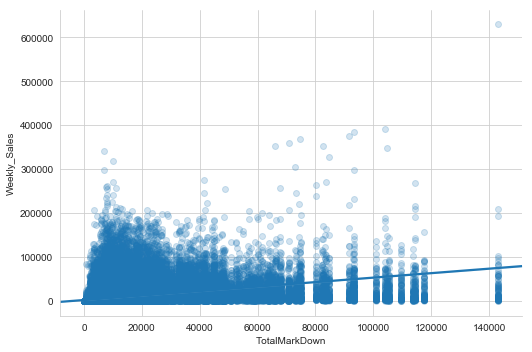

In [32]:
sns.lmplot(x='TotalMarkDown', y='Weekly_Sales', data=final2, aspect=1.5, scatter_kws={'alpha':0.2});

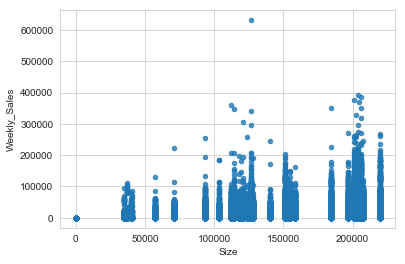

In [33]:
final2.plot(kind='scatter', x='Size', y='Weekly_Sales', alpha=0.8)

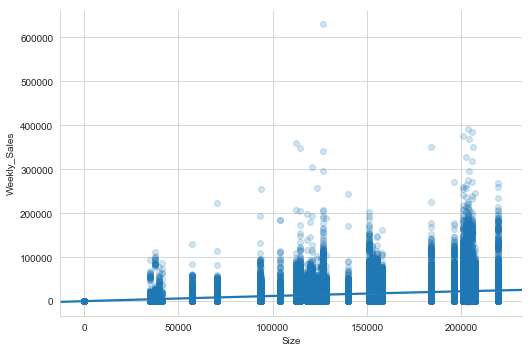

In [34]:
sns.lmplot(x='Size', y='Weekly_Sales', data=final2, aspect=1.5, order = 2, scatter_kws={'alpha':0.2});

In [35]:
feature_cols = final2.columns.drop(['Date', 'Weekly_Sales', 'IsHoliday', 'CPI', 'Unemployment', 'Type'])
X = final2[feature_cols]
y = final2.Weekly_Sales

In [36]:
from sklearn.linear_model import LinearRegression
# Instantiate the model.
lr = LinearRegression()

In [37]:
# Import the class.
from sklearn.linear_model import LinearRegression

# Instantiate the model.
lr = LinearRegression()

# Train the model on the entire data set.
lr.fit(X, y)

# Predict the response values for the observations in X ("test the model").
lr.predict(X)

array([27.04961693, 27.04961693, 27.04961693, ..., 27.04961693,
       27.04961693, 27.04961693])

In [38]:
y_pred = lr.predict(X)

In [39]:
from sklearn import metrics

print(metrics.mean_squared_error(y, y_pred))

91359249.14090711


In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [41]:
# Before splitting
print(X.shape)

# After splitting
print(X_train.shape)
print(X_test.shape)

(421570, 2)
(316177, 2)
(105393, 2)


In [42]:
# Before splitting
print(y.shape)

# After splitting
print(y_train.shape)
print(y_test.shape)

(421570,)
(316177,)
(105393,)


In [43]:
# WITH a random_state parameter:
#  (Same split every time! Note you can change the random state to any integer.)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Print the first element of each object.
print(X_train.head(1))
print(X_test.head(1))
print(y_train.head(1))
print(y_test.head(1))

        Size  TotalMarkDown
286874     0            0.0
        Size  TotalMarkDown
126303     0            0.0
286874    0.0
Name: Weekly_Sales, dtype: float64
126303    0.0
Name: Weekly_Sales, dtype: float64


In [44]:
final2.corr()

,Weekly_Sales,CPI,Unemployment,Size,TotalMarkDown
Weekly_Sales,1.000000,0.532780,0.526487,0.577144,0.445940
CPI,0.532780,1.000000,0.924783,0.919211,0.675598
Unemployment,0.526487,0.924783,1.000000,0.913082,0.689665
Size,0.577144,0.919211,0.913082,1.000000,0.719587
TotalMarkDown,0.445940,0.675598,0.689665,0.719587,1.000000


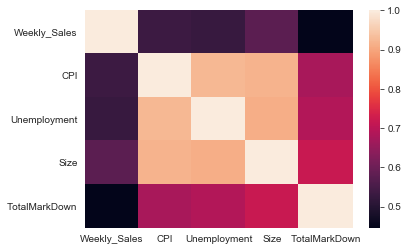

In [45]:
# Visualize correlation matrix in Seaborn using a heat map.
sns.heatmap(final2.corr())

In [46]:
import patsy

In [47]:
y, X = patsy.dmatrices("Weekly_Sales ~ Size + TotalMarkDown", data=final2, return_type="dataframe")

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=99)

In [48]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [49]:
y_pred = lr.predict(X_test)

print(metrics.mean_squared_error(y_train, lr.predict(X_train)))
print(metrics.mean_squared_error(y_test, y_pred))

91500907.6559657
90934679.78388119


In [50]:
from sklearn import model_selection

In [51]:
kf = model_selection.KFold(n_splits=5, shuffle=True)

In [52]:
mse_values = []
scores = []
n = 0

print("~~~~ CROSS VALIDATION each fold ~~~~")
for train_index, test_index in kf.split(X, y):
    lr = LinearRegression().fit(X.iloc[train_index], y.iloc[train_index])
    
    mse_values.append(metrics.mean_squared_error(y.iloc[test_index], lr.predict(X.iloc[test_index])))
    scores.append(lr.score(X, y))
    
    n += 1
    
    print('Model {}'.format(n))
    print('MSE: {}'.format(mse_values[n-1]))
    print('R2: {}\n'.format(scores[n-1]))


print("~~~~ SUMMARY OF CROSS VALIDATION ~~~~")
print('Mean of MSE for all folds: {}'.format(np.mean(mse_values)))
print('Mean of R2 for all folds: {}'.format(np.mean(scores)))

~~~~ CROSS VALIDATION each fold ~~~~
Model 1
MSE: 87262954.97615875
R2: 0.3350366128212967

Model 2
MSE: 88884324.45407353
R2: 0.33502572127150465

Model 3
MSE: 87919532.30921109
R2: 0.33503025333229286

Model 4
MSE: 94994790.78123364
R2: 0.33504081830422006

Model 5
MSE: 97783103.82867244
R2: 0.3350352845885345

~~~~ SUMMARY OF CROSS VALIDATION ~~~~
Mean of MSE for all folds: 91368941.26986988
Mean of R2 for all folds: 0.3350337380635698


In [53]:
from sklearn.model_selection import cross_val_score

# Note the results will vary each run since we take a different
#   subset of the data each time (since shuffle=True)
kf = model_selection.KFold(n_splits=5, shuffle=True)

print(np.mean(-cross_val_score(lr, X, y, cv=kf, scoring='neg_mean_squared_error')))
print(np.mean(cross_val_score(lr, X, y, cv=kf)))

91367925.52757612
0.3350282757653574


In [54]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    # Determining rolling statistics:
    rolmean = timeseries.rolling(12).mean()
    rolstd = timeseries.rolling(12).std()

    # Plotting rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Performing the Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

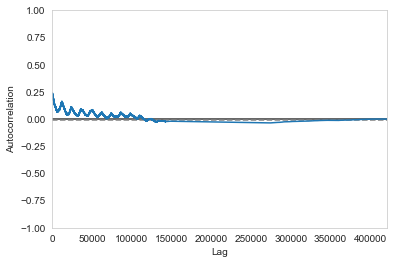

In [55]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(final2.Weekly_Sales)

In [56]:
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.graphics.tsaplots import plot_pacf

In [57]:
plot_acf(final2.Weekly_Sales.values, lags=30)
plt.show()

NameError: name 'store1_data' is not defined

In [ ]:
plot_pacf(final2.Weekly_Sales.values, lags=30)
plt.show()